In [ ]:
# Read the data from the file solarPower_50m.csv and display the first 5 rows of the data
import pandas as pd
df = pd.read_csv("/content/solarPower_50m.csv")
df.head()

,Unnamed: 0,precip,cloud cover,solar radiation,humidity,pressure,UV index,temp min,temp max,solar energy,PV output
0,2019-12-01,0.000,72.0,27.9,87.3,1024.4,2.0,0.9,5.4,2.4,0.748
1,2019-12-02,0.120,41.2,NaN,82.0,1032.6,2.0,-1.1,5.8,3.9,1.122
2,2019-12-03,0.000,59.8,42.5,82.6,1027.7,3.0,2.1,8.2,3.7,1.091
3,2019-12-04,0.096,26.2,43.8,90.6,1020.7,3.0,1.0,6.9,3.7,1.060
4,2019-12-05,0.134,85.2,26.5,91.5,1019.4,2.0,1.9,9.7,2.3,0.712


In [ ]:
# Assign the column name to the data column
df.rename(columns = {"Unnamed: 0": "date"}, inplace=True) #rename first column to date
#convert to date format
# df['date'] = pd.to_datetime(df['date'])
# df.set_index(df['date'], inplace = True)

In [ ]:
df.head()

,date,precip,cloud cover,solar radiation,humidity,pressure,UV index,temp min,temp max,solar energy,PV output
0,2019-12-01,0.000,72.0,27.9,87.3,1024.4,2.0,0.9,5.4,2.4,0.748
1,2019-12-02,0.120,41.2,NaN,82.0,1032.6,2.0,-1.1,5.8,3.9,1.122
2,2019-12-03,0.000,59.8,42.5,82.6,1027.7,3.0,2.1,8.2,3.7,1.091
3,2019-12-04,0.096,26.2,43.8,90.6,1020.7,3.0,1.0,6.9,3.7,1.060
4,2019-12-05,0.134,85.2,26.5,91.5,1019.4,2.0,1.9,9.7,2.3,0.712


In [ ]:
print(df.dtypes)

date                object
precip             float64
cloud cover        float64
solar radiation    float64
humidity           float64
pressure           float64
UV index           float64
temp min           float64
temp max           float64
solar energy       float64
PV output          float64
dtype: object


In [ ]:
df.isnull().sum() #check for null values

,0
date,0
precip,0
cloud cover,0
solar radiation,0
humidity,0
pressure,0
UV index,0
temp min,0
temp max,0
solar energy,0


In [ ]:
#Fill null values with median values
df['pressure'].fillna(df['pressure'].median(), inplace=True)
df['solar radiation'].fillna(df['solar radiation'].median(), inplace=True)
# df = df.assign(
#     pressure = df['pressure'].fillna(df['pressure'].median()),
#     solar_radiation = df['solar radiation'].fillna(df['solar radiation'].median())
# )


<ipython-input-4-e4e442a14aab>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pressure'].fillna(df['pressure'].median(), inplace=True)
<ipython-input-4-e4e442a14aab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
df.isnull().sum()

,0
date,0
precip,0
cloud cover,0
solar radiation,0
humidity,0
pressure,0
UV index,0
temp min,0
temp max,0
solar energy,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             793 non-null    object 
 1   precip           793 non-null    float64
 2   cloud cover      793 non-null    float64
 3   solar radiation  793 non-null    float64
 4   humidity         793 non-null    float64
 5   pressure         793 non-null    float64
 6   UV index         793 non-null    float64
 7   temp min         793 non-null    float64
 8   temp max         793 non-null    float64
 9   solar energy     793 non-null    float64
 10  PV output        793 non-null    float64
dtypes: float64(10), object(1)
memory usage: 68.3+ KB




1.   precip: daily aggregate liquid precipitation;
2.   cloud cover: percentage of the visible sky that is covered by cloud;
3.   solar radiation: solar radiation power (in W/m2);
4.   humidity: relative humidity (expressed as a percentage);
5.   pressure: sea level atmospheric pressure (in millibars);
6.   UV index: an indicator for the level of daily UV exposure, based on the amount of short-wave solar radiation and dependent on the cloud cover, type of cloud, altitude and time of year; 0 represents no exposure, 10 represents a high level of exposure;
7. temp min: minimum daily temperature
8. temp max: maximum daily temperature
9. solar energy: daily aggregate energy from the sun (in MJ/m2)
10.PV output: daily aggregate energy output (in kWh) from a PV array with maximum capacity of 1 kWp

In [ ]:
df.describe()

,precip,cloud cover,solar radiation,humidity,pressure,UV index,temp min,temp max,solar energy,PV output
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,2.652846,66.108701,107.576040,83.719420,1015.695271,4.050441,7.019546,13.164817,9.262169,2.804861
std,4.604500,20.495106,82.855099,9.526572,11.448885,2.471040,4.598832,5.340954,7.247400,2.044960
min,0.000000,0.000000,7.200000,47.700000,975.100000,0.000000,-3.900000,-0.100000,0.700000,0.078000
25%,0.024000,53.400000,33.300000,78.500000,1008.300000,2.000000,3.400000,9.400000,2.800000,0.855000
50%,0.506000,68.200000,88.400000,85.400000,1016.750000,4.000000,7.200000,12.200000,7.400000,2.462000
75%,3.340000,82.200000,161.600000,91.000000,1023.700000,6.000000,10.700000,17.300000,14.100000,4.566000
max,36.276000,100.000000,319.700000,98.900000,1048.400000,10.000000,18.300000,29.700000,27.700000,6.873000


In [ ]:
df['date'] = pd.to_datetime(df['date']) #convert date to datetime

In [ ]:
print(df.dtypes)

date               datetime64[ns]
precip                    float64
cloud cover               float64
solar radiation           float64
humidity                  float64
pressure                  float64
UV index                  float64
temp min                  float64
temp max                  float64
solar energy              float64
PV output                 float64
dtype: object


In [ ]:
df.head()

,date,precip,cloud cover,solar radiation,humidity,pressure,UV index,temp min,temp max,solar energy,PV output
0,2019-12-01,0.000,72.0,27.9,87.3,1024.4,2.0,0.9,5.4,2.4,0.748
1,2019-12-02,0.120,41.2,88.4,82.0,1032.6,2.0,-1.1,5.8,3.9,1.122
2,2019-12-03,0.000,59.8,42.5,82.6,1027.7,3.0,2.1,8.2,3.7,1.091
3,2019-12-04,0.096,26.2,43.8,90.6,1020.7,3.0,1.0,6.9,3.7,1.060
4,2019-12-05,0.134,85.2,26.5,91.5,1019.4,2.0,1.9,9.7,2.3,0.712


In [ ]:
# train test split
# Define the training period (first two years) and testing period (final two months)
train_end_date = df['date'].min() + pd.DateOffset(years=2)
test_start_date = df['date'].max() - pd.DateOffset(months=2)

# Split data
train_data = df[df['date'] < train_end_date]
test_data = df[df['date'] >= test_start_date]

# Verify split
train_data.shape, test_data.shape


((731, 11), (63, 11))

In [ ]:
# Exclude non-numeric columns
numeric_data = train_data.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

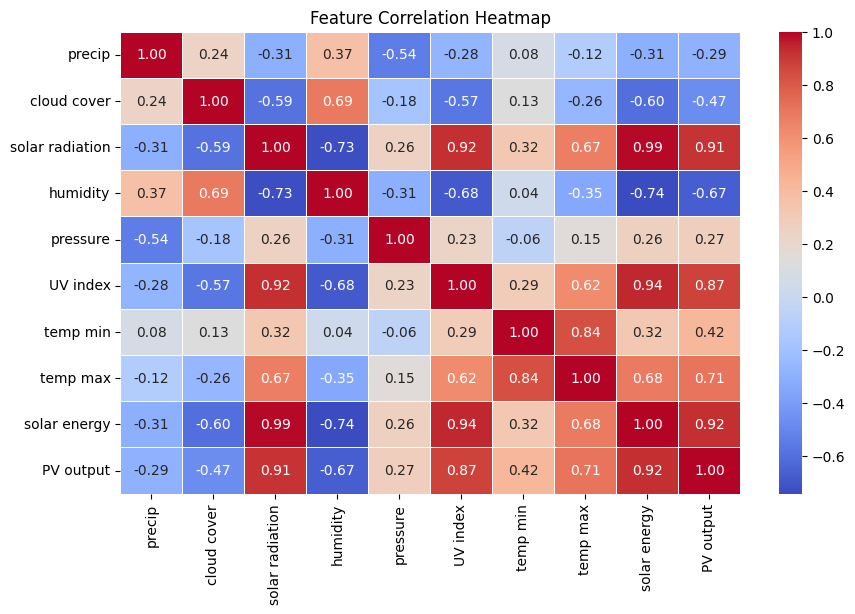

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
# corr_matrix = train_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
print(train_data.dtypes)

date               datetime64[ns]
precip                    float64
cloud cover               float64
solar radiation           float64
humidity                  float64
pressure                  float64
UV index                  float64
temp min                  float64
temp max                  float64
solar energy              float64
PV output                 float64
dtype: object


In [ ]:
# Define the features and target variable
X_train, y_train = train_data.iloc[:,1:10], train_data.iloc[:,10]
X_test, y_test = test_data.iloc[:, 1:10], test_data.iloc[:, 10]

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(731, 9) (731,)
(63, 9) (63,)


In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler
#Standardise features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)


In [ ]:
#Model training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_s, y_train)


LinearRegression()

In [ ]:
#Predictions and Calculate Error
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred = model.predict(X_test_s)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root mean squared error, {rmse:.2f}")

Root mean squared error, 2.73


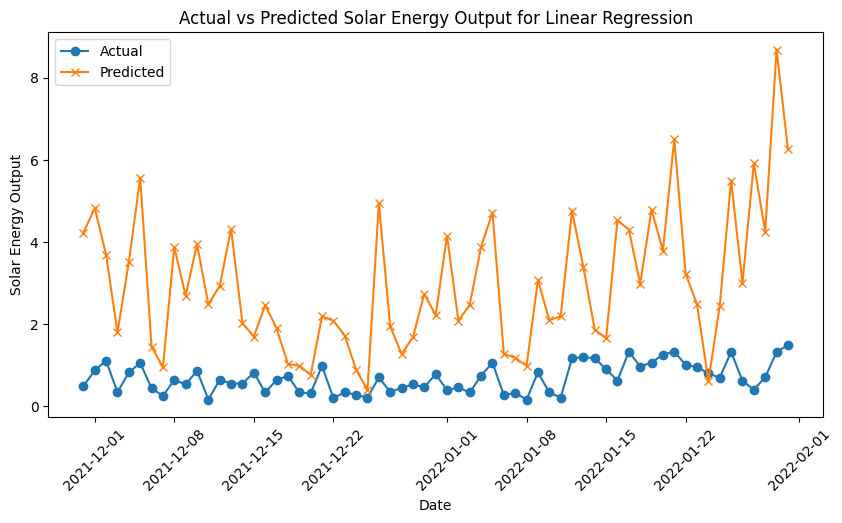

In [ ]:
#Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 5])
plt.plot(test_data['date'], y_test, label='Actual', marker='o')
plt.plot(test_data['date'], y_pred, label='Predicted', marker='x')
plt.plot()
plt.legend() #label box
plt.xlabel("Date")
plt.ylabel("Solar Energy Output")
plt.title("Actual vs Predicted Solar Energy Output for Linear Regression")
plt.xticks(rotation=45)
plt.show()



In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

MAE: 2.4824325895576327, R²: -62.40212653276464


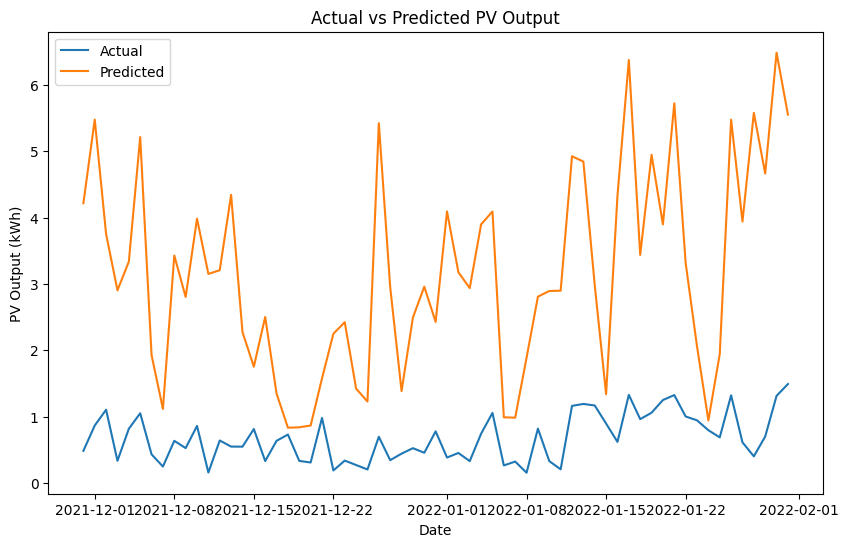

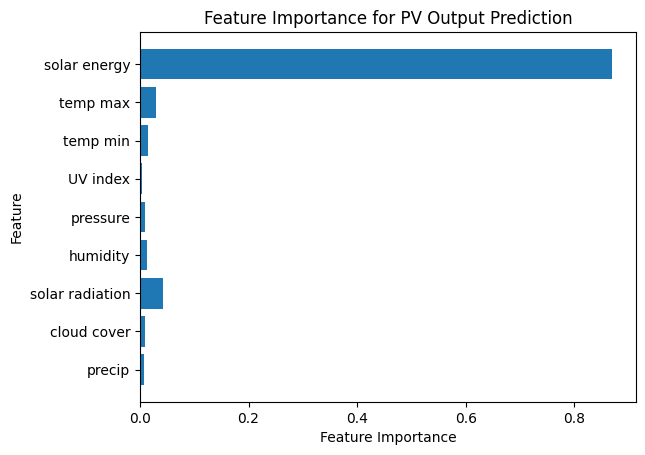

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

grid_search = GridSearchCV(model_RFR, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_s, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_s)
 #Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, R²: {r2}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('PV Output (kWh)')
plt.title('Actual vs Predicted PV Output')
plt.show()

#Feature Importance Analysis
importances = best_model.feature_importances_
feature_names = X_train.columns
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for PV Output Prediction')
plt.show()


In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
xgb_model = xgb.XGBRegressor(
    objective = "reg:squarederror",
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=10,
    random_state=42
)

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

mean absolute error: 0.2051
Root mean squared error: 0.2418


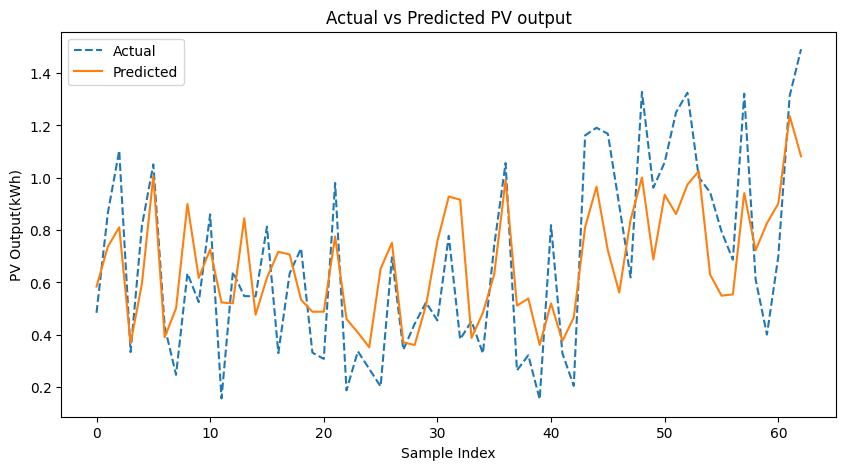

In [ ]:
y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"mean absolute error: {mae:.4f}")
print(f"Root mean squared error: {rmse:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", linestyle="dashed")
plt.plot(y_pred, label="Predicted", linestyle="solid")
plt.title("Actual vs Predicted PV output")
plt.xlabel("Sample Index")
plt.ylabel("PV Output(kWh)")
plt.legend()
plt.show()